In [1]:
# !!!!!Import rest of the libraries required
import seaborn as sns
import matplotlib.pyplot as plt
import math


# Load the Diamonds dataset from Seaborn
diamonds_data = sns.load_dataset("diamonds")
diamonds_data.head(5)





,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [34]:
## STATISTICS challenge:

# +calculate the mean of the price by cut
# +calculate the standard deviation of the price by cut
# +calculate the median of the price by cut
# +calculate the mode of the price by cut
# +calculate the variance of the price by cut
# +calculate the 25 and 75 percentile of the price by cut
# +calculate the range of the price by cut

# +bonus 1:
# is there a correlation between the price and the carat? If so, what kind of correlation is it?
# what about covariance?


# +bonus 2 if you have a lot of time:
# make a function on your own that calculates the standard deviation of a list of numbers (you can find the formula in last weeks slides)

In [35]:
grouped_data_by_cut=diamonds_data.groupby('cut')['price']

In [36]:
# calculate the mean of the price by cut

mean_price_by_cut = grouped_data_by_cut.mean().round(2)

# Sorting the mean prices in descending order
mean_price_by_cut_sorted = mean_price_by_cut.sort_values(ascending=False)

print(mean_price_by_cut_sorted)

cut
Premium      4584.26
Fair         4358.76
Very Good    3981.76
Good         3928.86
Ideal        3457.54
Name: price, dtype: float64


In [37]:
# calculate the standard deviation of the price by cut
stdev_price_by_cut=grouped_data_by_cut.std().round(2)

print(stdev_price_by_cut.sort_values(ascending=False))

cut
Premium      4349.20
Very Good    3935.86
Ideal        3808.40
Good         3681.59
Fair         3560.39
Name: price, dtype: float64


In [38]:
# calculate the median of the price by cut

median_price_by_cut=grouped_data_by_cut.median().round(2)

print(median_price_by_cut.sort_values(ascending=False))

cut
Fair         3282.0
Premium      3185.0
Good         3050.5
Very Good    2648.0
Ideal        1810.0
Name: price, dtype: float64


In [39]:
# calculate the mode of the price by cut

mode_price_by_cut=grouped_data_by_cut.agg(lambda x: x.mode()[0])

print(mode_price_by_cut.sort_values(ascending=False))

cut
Fair         2167
Ideal         828
Premium       802
Very Good     552
Good          544
Name: price, dtype: int64


In [40]:
#calculate the variance of the price by cut

var_price_by_cut=grouped_data_by_cut.var().round(2)

print(var_price_by_cut.sort_values(ascending=False))

cut
Premium      18915583.80
Very Good    15491010.95
Ideal        14503919.49
Good         13554101.86
Fair         12676352.83
Name: price, dtype: float64


In [41]:
#calculate the 25 and 75 percentile of the price by cut
percentile_price_by_price=grouped_data_by_cut.quantile([0.25, 0.75])

print(percentile_price_by_price.sort_values(ascending=False))

cut            
Premium    0.75    6296.00
Very Good  0.75    5372.75
Fair       0.75    5205.50
Good       0.75    5028.00
Ideal      0.75    4678.50
Fair       0.25    2050.25
Good       0.25    1145.00
Premium    0.25    1046.00
Very Good  0.25     912.00
Ideal      0.25     878.00
Name: price, dtype: float64


In [42]:
# calculate the range of the price by cut

range_prices_by_cut=grouped_data_by_cut.apply(lambda x: x.max() - x.min())

print(range_prices_by_cut.sort_values(ascending=False))

cut
Premium      18497
Very Good    18482
Ideal        18480
Good         18461
Fair         18237
Name: price, dtype: int64


In [43]:
#is there a correlation between the price and the carat? If so, what kind of correlation is it?

correlation = diamonds_data['price'].corr(diamonds_data['carat'])

print("correlation: ", correlation.round(3))

covariance = diamonds_data['price'].cov(diamonds_data['carat'])

print("covariance: ", covariance.round(3))


correlation:  0.922
covariance:  1742.765


The value of 0.922 suggests that there is a strong positive correlation between the price and the carat of diamonds in this dataset.
The positive covariance means that as carat increases, price tends to increase, and vice versa. 

In [49]:
# make a function on your own that calculates the standard deviation of a list of numbers (you can find the formula in last weeks slides)

def calculate_stdev(numbers):
    mean=numbers.mean()
    sq_diff_sum=sum((x-mean)**2 for x in numbers)
    variance=sq_diff_sum/len(numbers)
    st_dev=math.sqrt(variance)
    return(st_dev)

numbers=diamonds_data['price']
std=calculate_stdev(numbers)
print("Standart deviation: ", std)

Standart deviation:  3989.402757628797


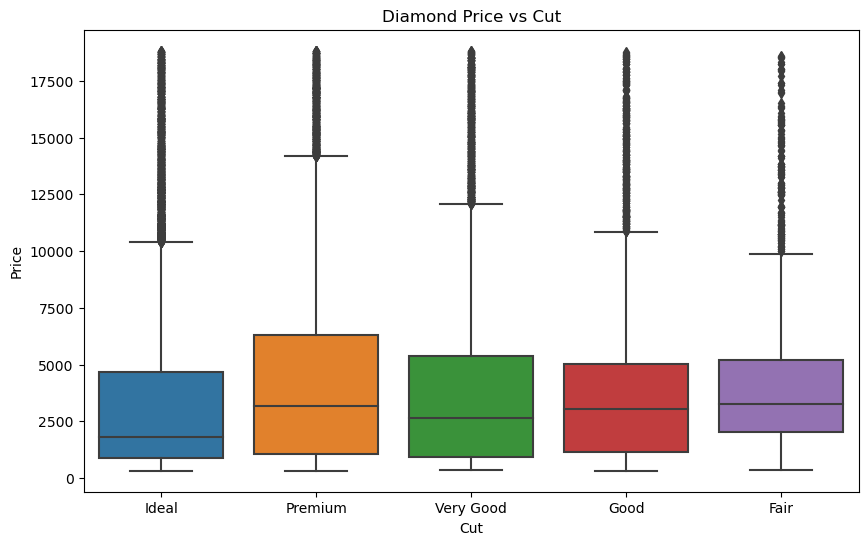

In [51]:
# 1. Boxplot of Diamond Price Vs Cut

plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=diamonds_data)
plt.title('Diamond Price vs Cut')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()


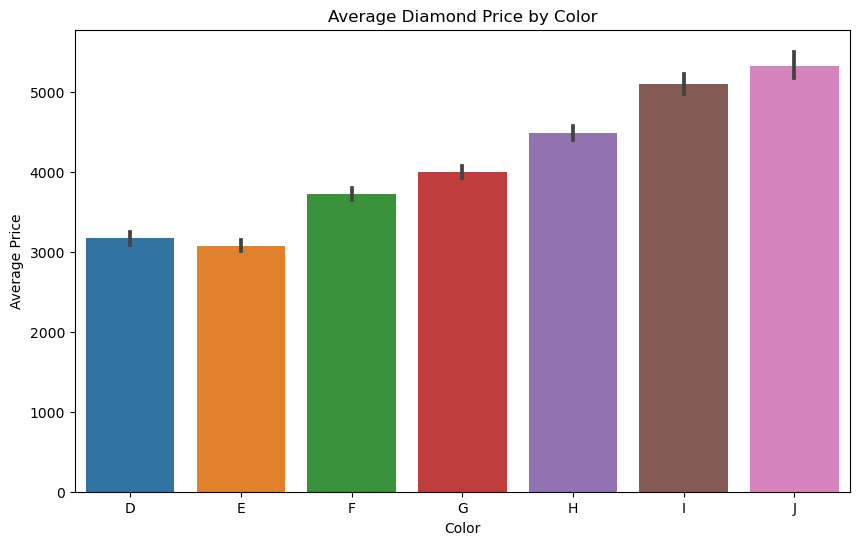

In [52]:
# 2. Barplot: Average Diamond Price by Color

plt.figure(figsize=(10, 6))
sns.barplot(x='color', y='price', data=diamonds_data, estimator=lambda x: sum(x) / len(x))
plt.title('Average Diamond Price by Color')
plt.xlabel('Color')
plt.ylabel('Average Price')
plt.show()

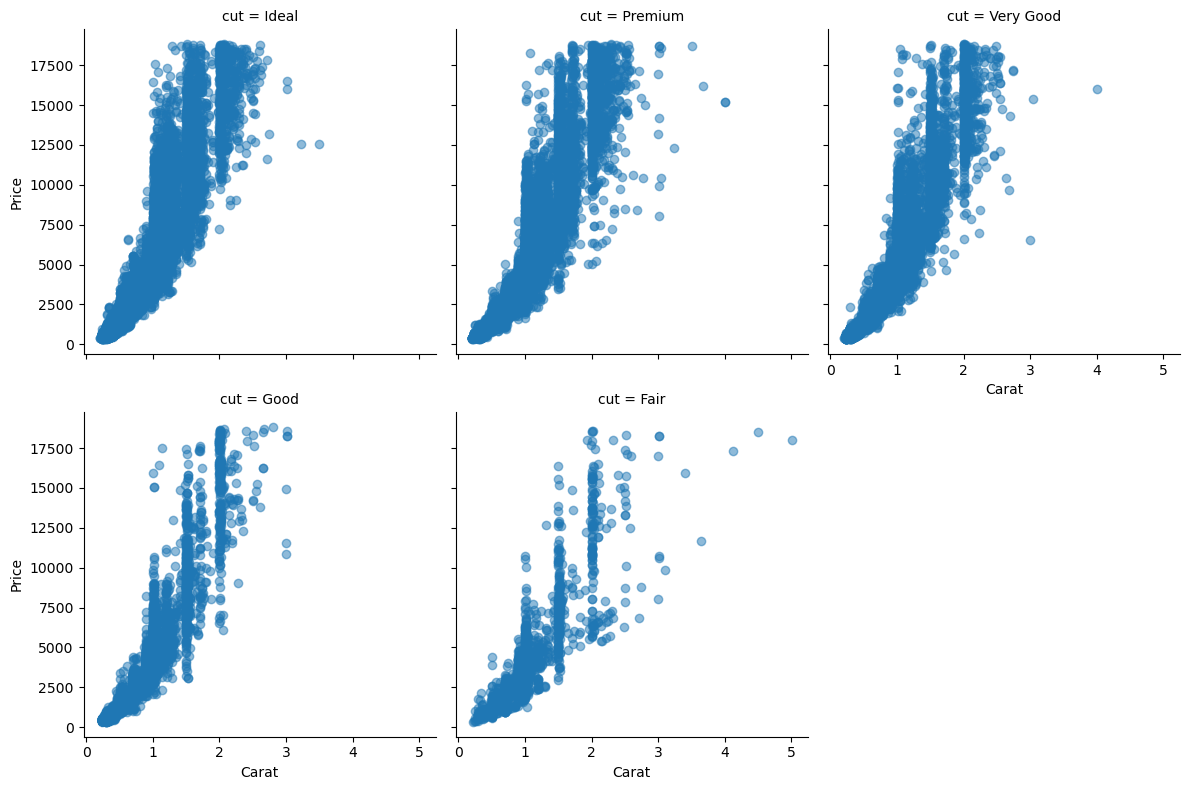

In [53]:
# 3. Scatterplot with Facets: Scatterplot of Carat vs. Price by Cut"
g = sns.FacetGrid(diamonds_data, col="cut", col_wrap=3, height=4)
g.map(plt.scatter, "carat", "price", alpha=0.5)
g.set_axis_labels("Carat", "Price")
plt.show()

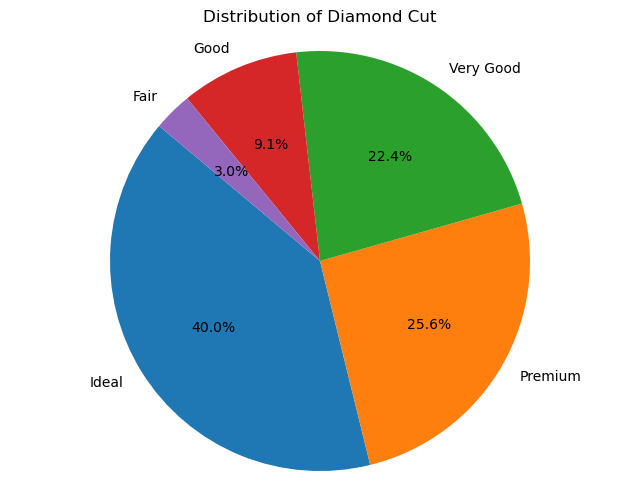

In [54]:
# 4. Pie Chart: Distribution of Diamond Cut
# Count the occurrences of each cut
cut_counts = diamonds_data['cut'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(cut_counts, labels=cut_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Diamond Cut')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

C:\Users\deer1\AppData\Local\Temp\ipykernel_20088\3069128644.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = diamonds_data.corr()


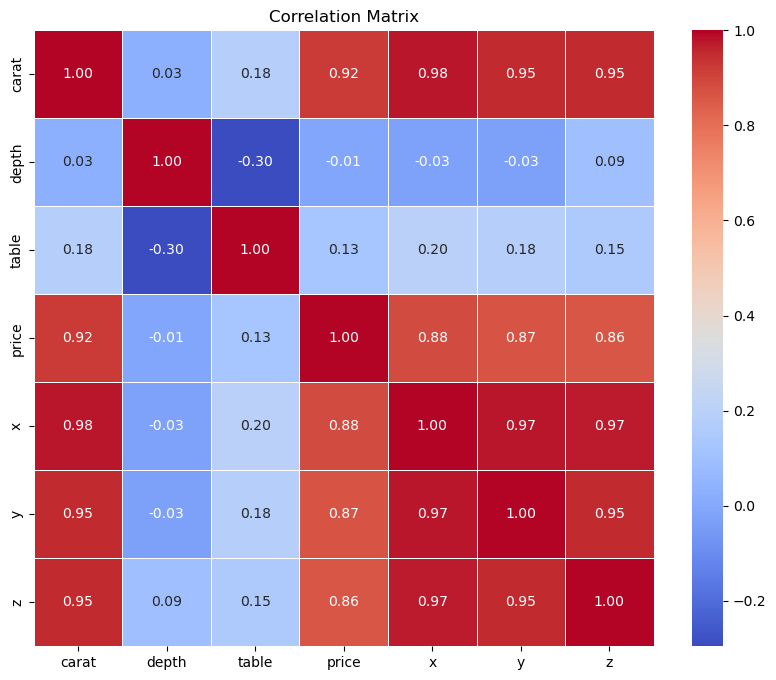

In [56]:
# Create a correlation matrix
correlation_matrix = diamonds_data.corr()

# Create a correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()